In [105]:
import numpy as np
import math
from matplotlib import pyplot as plt
from random import choice, random, randint


class Generator:
    def __init__(self, rad_frac_=4.0, lim_=40, cnt_=200, clusters_cnt_=5):
        # generating 2D points for better visualisation

        self.rad_frac = rad_frac_
        # self.rad_frac = N / rad, where N is side of square inside which we generate points
        # so the less self.rad is, the bigger is rad, so the harder for the algorithm it becomes (clusters become closer to each other)

        self.lim = lim_
        # side of a square inside which we generate points

        self.cnt = cnt_
        # ~ number of points

        self.clusters_cnt = clusters_cnt_
        return

    # useful functions
    def rand_point_in_disk(self, c, r):
        theta = 2 * math.pi * random()
        s = r * random()
        x, y = c
        return x + s * math.cos(theta), y + s * math.sin(theta)
    
    def rand_cluster(self, n, c, r):
        # return n random points inside disk with center = c and radius = r
        x, y = c
        points = []
        for i in range(int(n)): 
            points.append(self.rand_point_in_disk(c, r))
        return points

    def rand_clusters(self, k, n, r, lim):
        # return k clusters of n points each, centers of clusters are (x, y), where 0 <= x <= lim, 0 <= y <= lim
        clusters = []
        for _ in range(int(k)):
            x = lim * random()
            y = lim * random()
            clusters.extend(self.rand_cluster(n, (x, y), r))
        return clusters

    def dist_2d(self, a, b):
        x1, y1 = a
        x2, y2 = b
        return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def rand_subcluster(self, n, c1, c2):
        # generate two subclusters n points each as points inside two disks with one point of intersection
        r = self.dist_2d(c1, c2) / 2
        cluster1 = self.rand_cluster(n, c1, r)
        cluster2 = self.rand_cluster(n, c2, r)
        return cluster1, cluster2

    def rand_subclusters(self, k, n, r, lim):
        # generate k pairs of 2 subclusters n points each
        clusters = []
        for _ in range(k):
            x1 = lim * random()
            y1 = lim * random()
            x2, y2 = self.rand_point_in_disk((x1, y1), r * 2.0)
            cluster1, cluster2 = self.rand_subcluster(n, (x1, y1), (x2, y2))
            clusters.extend(cluster1)
            clusters.extend(cluster2)
        return clusters

    # generating functions
    def generate_with_noise(self, noise_percentage = 5.0):
        num_of_clusters = self.clusters_cnt
        n = self.cnt / num_of_clusters
        r = self.lim / (self.rad_frac * num_of_clusters)
        clusters = self.rand_clusters(num_of_clusters, n, r, self.lim)
        
        noise_cnt = int(len(clusters)  / 100.0 * noise_percentage)
        for _ in range(noise_cnt):
            clusters.append(self.rand_point_in_disk((self.lim / 2.0, self.lim / 2.0), self.lim / 2.0))
        return clusters

    def generate_with_density(self, density_multiplier = 2.0):
        # assume one of cluster has two times more points than others
        num_of_clusters = self.clusters_cnt
        n = self.cnt / num_of_clusters
        r = self.lim / (self.rad_frac * num_of_clusters)
        clusters = self.rand_clusters(num_of_clusters - 1, n, r, self.lim)
        x = self.lim * random()
        y = self.lim * random()
        clusters.extend(self.rand_cluster(n * density_multiplier, (x, y), r))
        return clusters

    def generate_with_subclusters(self):
        num_of_pairs_of_clusters = self.clusters_cnt
        n = self.cnt / (num_of_pairs_of_clusters * 2)
        r = self.lim / (self.rad_frac * num_of_pairs_of_clusters * 2)
        clusters = self.rand_subclusters(num_of_pairs_of_clusters, n, r, self.lim)
        return clusters

    def generate_with_skew(self, multiplier = 2.0):
        # assume one of cluster has two times more radius than others
        num_of_clusters = self.clusters_cnt
        n = self.cnt / num_of_clusters
        r = self.lim / (self.rad_frac * num_of_clusters)
        clusters = self.rand_clusters(num_of_clusters - 1, n, r, self.lim)
        x = self.lim * random()
        y = self.lim * random()
        clusters.extend(self.rand_cluster(n, (x, y), r * multiplier))
        return clusters

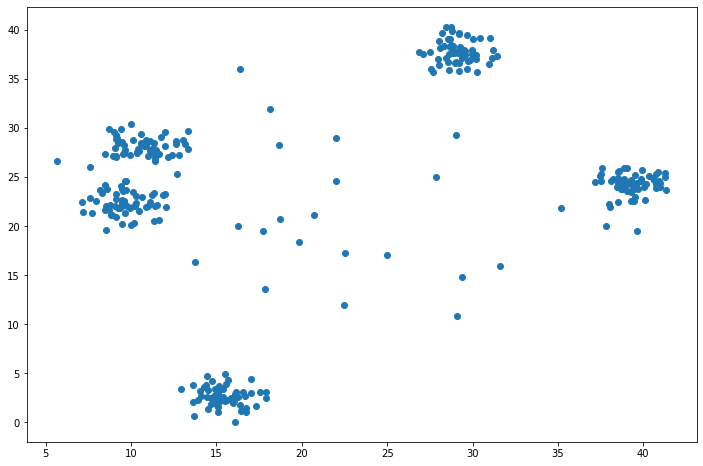

In [106]:
# generation with noise 10%
plt.figure(figsize=(12, 8))
g = Generator(3.0, 40, 300, 5)
points = g.generate_with_noise(10.0)
x = []
y = []
for X, Y in points:
    x.append(X)
    y.append(Y)
plt.scatter(x, y)
plt.show()

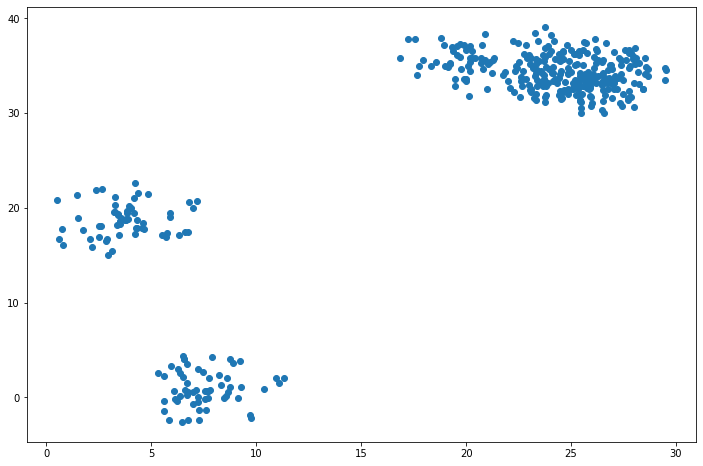

In [107]:
# generation with density (x3 points in one of clusters)
plt.figure(figsize=(12, 8))
g = Generator(2.0, 40, 300, 5)
points = g.generate_with_density(3)
x = []
y = []
for X, Y in points:
    x.append(X)
    y.append(Y)
plt.scatter(x, y)
plt.show()

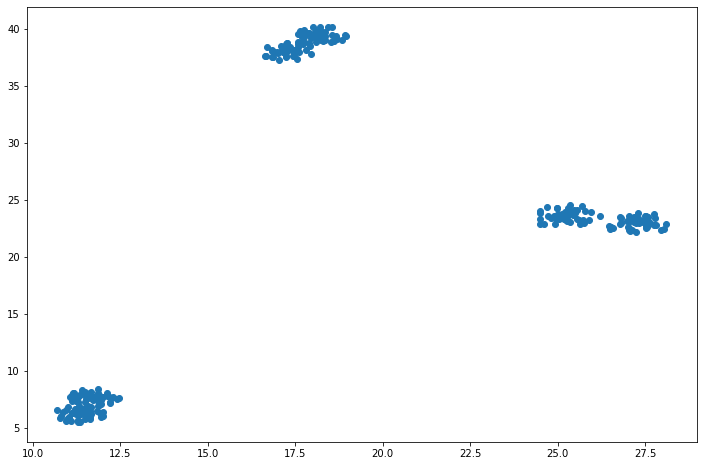

In [108]:
plt.figure(figsize=(12, 8))
g = Generator(2.0, 40, 300, 3)
points = g.generate_with_subclusters()
x = []
y = []
for X, Y in points:
    x.append(X)
    y.append(Y)
plt.scatter(x, y)
plt.show()

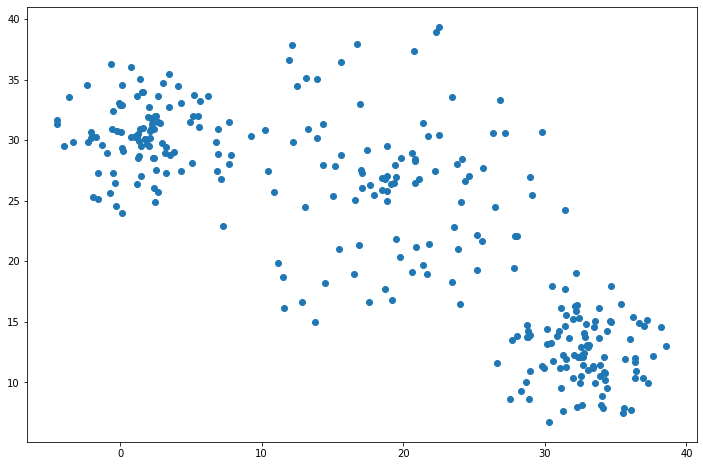

In [109]:
plt.figure(figsize=(12, 8))
g = Generator(2.0, 40, 300, 3)
points = g.generate_with_skew(2.0)
x = []
y = []
for X, Y in points:
    x.append(X)
    y.append(Y)
plt.scatter(x, y)
plt.show()